In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [7]:
models_trees = load('trees.joblib')
models_knn = load('knn.joblib')
models_bayes = load('Bayes.joblib')

In [8]:
models = models_trees + models_bayes + models_knn

In [9]:
X_train, X_test, y_train, y_test = load('../../preprocessing/classification_data.joblib')

/home/stefan/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
/home/stefan/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/home/stefan/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


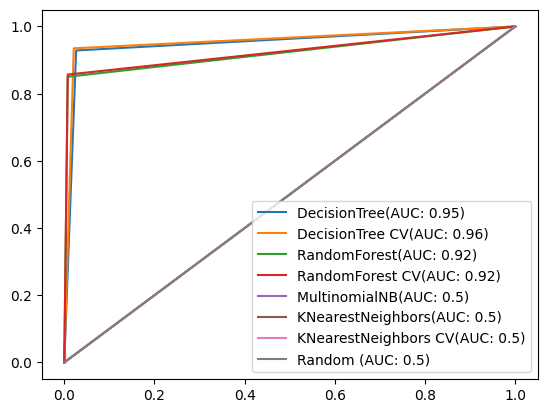

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score
model_names = ['DecisionTree','DecisionTree CV','RandomForest','RandomForest CV', 'MultinomialNB', 'KNearestNeighbors','KNearestNeighbors CV']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    lab = model_name + "(AUC: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (AUC: 0.5)')
plt.legend()
plt.show()